# TD n°2 : données de trafic

code : Alexandre Jayol & Mathis Boukhellouf, doctorants au LICIT-Éco7

adapté d'un énoncé de Nicolas Chiabaut (Citec, ex-LICIT) inspiré de Christine Buisson (LICIT-Éco7)

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [3]:
## Considérations cosmétiques

Dans la case du dessous, la variable ``Q3`` est un *dataframe* contenant (à compléter). Les deux dernières lignes permettent de "nettoyer" ce tableau de données : le format des dates est ``heure:minute``, et on a donné un nom explicite à la colonne collectant les dates.

Exécutez cette case, puis celle d'après, pour voir quelle tête a ce tableau de données.

bla bla
Les unités des variables stockées dans les *dataframes* sont :
- pour le débit : véh/h
- pour la vitesse : km/h
- les taux d'occupation sont exprimés en pourcentages.

In [38]:
Boucle_1_jeudi = pd.read_csv('Boucle_1_jeudi.csv', header = 0, sep = ";")
Boucle_2_jeudi = pd.read_csv('Boucle_2_jeudi.csv', header = 0, sep = ";")
Boucle_3_jeudi = pd.read_csv('Boucle_3_jeudi.csv', header = 0, sep = ";")
Boucle_1_vendredi = pd.read_csv('Boucle_1_vendredi.csv', header = 0, sep = ";")
Boucle_2_vendredi = pd.read_csv('Boucle_2_vendredi.csv', header = 0, sep = ";")
Boucle_3_vendredi = pd.read_csv('Boucle_3_vendredi.csv', header = 0, sep = ";")

#
for numéro in ['1', '2', '3']:
    for jour in ['jeudi', 'vendredi']:
        nom_dataframe = globals()['Boucle_' + numéro + '_' + jour]
        nom_dataframe['Heure'] = pd.to_datetime(nom_dataframe['Heure'], format = "%H:%M").dt.time
        nom_dataframe.set_index('Heure')

In [39]:
Boucle_1_jeudi.Heure

0      06:00:00
1      06:01:00
2      06:02:00
3      06:03:00
4      06:04:00
         ...   
235    09:55:00
236    09:56:00
237    09:57:00
238    09:58:00
239    09:59:00
Name: Heure, Length: 240, dtype: object

In [4]:
Q3 = pd.read_csv("Q3.csv", header=0, sep=";")
Q3['Heure'] = pd.to_datetime(Q3['Heure'], format = "%H:%M")
Q3 = Q3.set_index('Heure')
Q3

,1 min,2 min,4 min,6 min
Heure,,,,
1900-01-01 06:00:00,1080,990,975,980
1900-01-01 06:01:00,900,990,975,980
1900-01-01 06:02:00,1080,960,975,980
1900-01-01 06:03:00,840,960,975,980
1900-01-01 06:04:00,1140,990,1005,980
...,...,...,...,...
1900-01-01 09:55:00,2580,2610,2790,3120
1900-01-01 09:56:00,3420,3180,3375,3120
1900-01-01 09:57:00,2940,3180,3375,3120


## Impact de la période d'agrégation

**Q3** : Tracez les chroniques sur le même graphique pour les différentes périodes d’agrégation de la boucle 1 et commentez.

In [76]:
Q3 = pd.read_csv("Q3.csv", header=0, sep=";")

In [78]:
Q3['Heure'] = pd.to_datetime(Q3['Heure'], format = "%H:%M").dt.time
Q3 = Q3.set_index('Heure')

In [79]:
Q3

,1 min,2 min,4 min,6 min
Heure,,,,
06:00:00,1080,990,975,980
06:01:00,900,990,975,980
06:02:00,1080,960,975,980
06:03:00,840,960,975,980
06:04:00,1140,990,1005,980
...,...,...,...,...
09:55:00,2580,2610,2790,3120
09:56:00,3420,3180,3375,3120
09:57:00,2940,3180,3375,3120


La case du dessous va vous permettre de tracer les chroniques du débit. Pour ce faire, vous allez choisir plusieurs valeurs de périodes d'agrégation temporelle, c'est-à-dire le temps sur lequel on moyenne les données agrégées pendant cette période de temps. 
Les données sont récoltées toutes les minutes, la période minimale d'agrégation est donc d'une minute.

Dans cette case :
- pour la 1ère ligne, choisissez une valeur de période d'agrégation en minute(s) et affectez-la à ``période_agreg`` ;
- la 2ème ligne permet de tracer la chronique du débit pour cette valeur, il n'y a rien à modifier ;
- copiez les deux lignes et collez-les à la suite, puis changez la valeur de la période d'agrégation ;
- recommencez pour avoir un peu plus de cinq valeurs différentes.

Exécutez la case et répondez à la Q3.

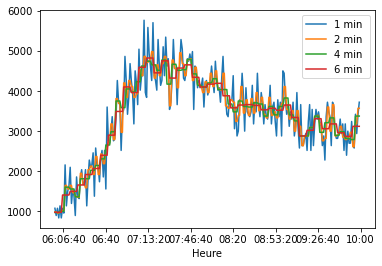

In [80]:
Q3.plot()
plt.show()

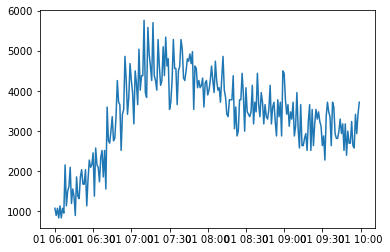

In [34]:
#Boucle_1_jeudi.plot('Heure', 'Debit')
plt.plot(Boucle_1_jeudi['Heure'], Boucle_1_jeudi['Debit'])

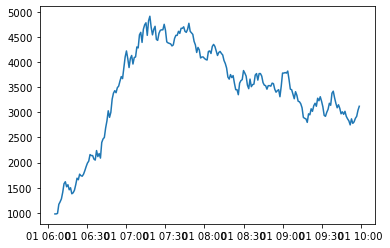

In [33]:
temps_agreg = 6
plt.plot(Boucle_1_jeudi['Heure'], Boucle_1_jeudi.Debit.rolling(temps_agreg).mean())

## Chroniques des variables caractéristiques

**Q4** : Tracez les chroniques du débit, de la vitesse et du taux d’occupation de chacune des boucles pour le vendredi. Identifiez différentes phases et commentez l’évolution des variables. Mesurez la durée de la congestion et la vitesse moyenne.

In [6]:
Q4 = pd.read_csv("E:/Expat/Sources Nicolas 2021/TP2/Q4.csv", header=0, sep=";")

In [7]:
Q4['Heure'] = pd.to_datetime(Q4['Heure'], format = "%H:%M")
Q4 = Q4.set_index('Heure')

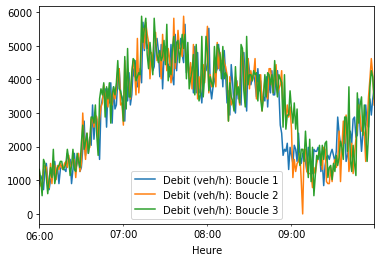

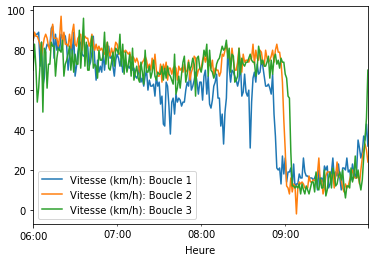

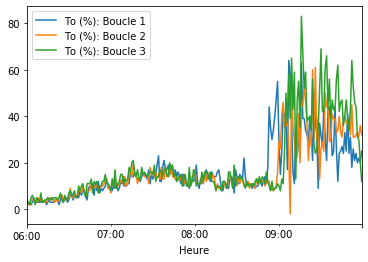

In [8]:
# Plot Débit (veh/h)
Q4.iloc[:,[0,1,2]].plot()
plt.show()
# Plot Vitesse (km/h)
Q4.iloc[:,[3,4,5]].plot()
plt.show()
# Plot T0 (%)
Q4.iloc[:,[6,7,8]].plot()
plt.show()

**Q5** : Reprenez **Q4** pour le jeudi. Comparez avec les chroniques du vendredi.

In [10]:
Q5 = pd.read_csv("E:/Expat/Sources Nicolas 2021/TP2/Q5.csv", header=0, sep=";")

In [11]:
Q5['Heure'] = pd.to_datetime(Q5['Heure'], format = "%H:%M")
Q5 = Q5.set_index('Heure')

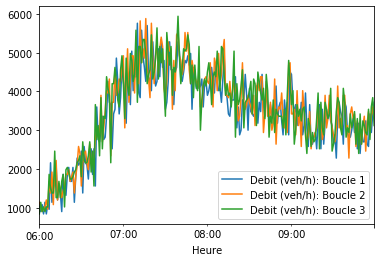

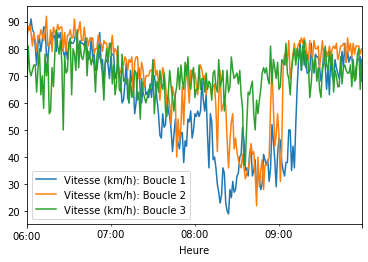

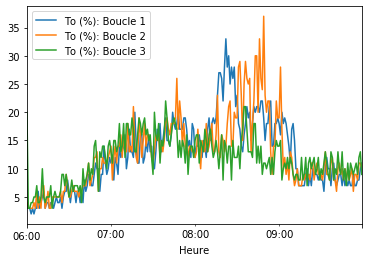

In [12]:
# Plot Débit (veh/h)
Q5.iloc[:,[0,1,2]].plot()
plt.show()
# Plot Vitesse (km/h)
Q5.iloc[:,[3,4,5]].plot()
plt.show()
# Plot T0 (%)
Q5.iloc[:,[6,7,8]].plot()
plt.show()

## Utilisation des courbes de véhicules cumulés

**Q6** : Construisez et tracez les CVC pour chacune des boucles.

In [ ]:
Q6_7= pd.read_csv(Chemin + "Q6-7.csv", header=0, sep=";")
Q6_7['Heure'] = pd.to_datetime(Q6_7['Heure'], format = "%H:%M")
Q6_7 = Q6_7.set_index('Heure')

Les CVC s'obtiennent par le cumul des comptages des véhicules qui passent, donnée présente sur la colonne ``0`` du *dataframe* ``Q6_7``, d'où ``(axis = 0)``.
Le code est écrit pour la boucle 1, recopiez-le pour les boucles 2 et 3.

In [ ]:
### Cumulative sum pour obtenir les CVC à chaque boucle
Q6_7['CVC_Boucle 1'] = Q6_7['Boucle 1'].cumsum(axis = 0)

# faites pareil pour les deux autres boucles 
Q6_7['CVC_Boucle 2'] = Q6_7['Boucle 2'].cumsum(axis = 0)
Q6_7['CVC_Boucle 3'] = Q6_7['Boucle 3'].cumsum(axis = 0) 

Il reste à tracer les CVC :

In [ ]:
# Plot
Q6_7.iloc[:,[3,4,5]].plot()
plt.show()

**Q7** : Tracez des CVC obliques et identifiez les différentes phases de fonctionnement. Les chroniques des vitesses aux différentes boucles peuvent vous aider à comprendre ce qui s’est passé. Donnez les valeurs moyennes de débits pour les différentes phases identifiées.

Si $N$ est le nombre de véhicules cumulés, dont la courbe représentative est donnée par une CVC, les CVC obliques sont la représentation graphique de $t \mapsto N(t) - \lambda_0 t$, où $\lambda_0$ est une valeur de débit à choisir.

À COMPLÉTER : à quoi servent les CVC ?

En général, on choisit $\lambda_0$ de sorte qu'il soit proche de la valeur du débit moyen. En lisant les CVC précédentes, estimez cette valeur moyenne et reportez-la, ci-dessous, dans la variable ``Debit_moy``.

In [ ]:
# Définition du débit moy (veh/min)
Debit_moy =

In [ ]:
# Calcul des CVC obliques
CVC_Oblique = pd.DataFrame([Q6_7.index, pd.Series(range(Debit_moy, Debit_moy*(len(Q6_7)+1), Debit_moy))]).T
CVC_Oblique = CVC_Oblique.rename(columns={CVC_Oblique.columns[0]: "Heure",CVC_Oblique.columns[1]: "CVC_Oblique"})
CVC_Oblique = CVC_Oblique.set_index('Heure')
Q6_7['o-CVC_Boucle 1']=Q6_7['CVC_Boucle 1'] - Q6_7['CVC_Oblique']
Q6_7['o-CVC_Boucle 2']=Q6_7['CVC_Boucle 2'] - Q6_7['CVC_Oblique']
Q6_7['o-CVC_Boucle 3']=Q6_7['CVC_Boucle 3'] - Q6_7['CVC_Oblique']

Q6_7['CVC_Oblique'] = CVC_Oblique.iloc[:,-1]

In [ ]:
# Tracé
Q6_7.iloc[:,-3:].plot()
plt.show()

**Q8** : Identifiez les instants de passage de la remontée de la congestion aux différentes boucles. Calculez la vitesse de remontée de la congestion.

In [ ]:
# import des données et nettoyage
Q8 = pd.read_csv(Chemin + "Q8.csv", header=0, sep=";")
Q8['Heure'] = pd.to_datetime(Q8['Heure'], format = "%H:%M")
Q8 = Q8.set_index('Heure')

# Tracé
Q8.plot()
plt.show()

# !! ajouter un plt.xlim() pour aider à la lecture

Estimez la vitesse de remontée de congestion $w$ à partir de vos observations. N'oubliez pas que les distances entre les boucles sont sur la figure 1 de l'énoncé.

## Diagramme fondamental et relation débit-vitesse

**Q9** : Tracez les diagrammes fondamentaux (relation $q = Q(k)$) ainsi que la relation $v = V(q)$ pour les boucles 1 et 2. Identifiez les zones fluides et congestionnées.

Ci-dessous, on importe le *dataframe* permettant de faire ces tracés. Avec tout ce que vous avez vu défiler depuis le début du TD, vous devriez être capables d'écrire un code qui fasse les tracés.
Petite précision : on parle ici de nuages de points, c'est donc un ``scatter`` qu'il faudra faire, et pas un ``plot``.

In [ ]:
Q9 = pd.read_csv(Chemin + "Q9.csv", header=0, sep=";")

In [ ]:
### à vous de jouer !